In [1]:
from utils.cluster import *
from utils.geo import *
from utils.loaddata import *
from utils.utils import *

In [2]:
data = get_h5data("./data/UnicomBJ_flows.h5")
print(data.shape)
print("time interval amounts(1 hour): ", data.shape[0])
print("grid horizontal amounts: ", data.shape[2])
print("grid vertical amounts: ", data.shape[3])

(2184, 2, 32, 32)
time interval amounts(1 hour):  2184
grid horizontal amounts:  32
grid vertical amounts:  32


In [3]:
inflow = data[:, 0, :, :].reshape(len(data), -1).T
outflow = data[:, 0, :, :].reshape(len(data), -1).T

# normalize
inflow_norm = norm_by_row(inflow)
outflow_norm = norm_by_row(outflow)

print("inflow_norm shape: ", inflow_norm.shape, \
    "outflow_norm shape: ", outflow_norm.shape)

inflow_norm shape:  (1024, 2184) outflow_norm shape:  (1024, 2184)


In [5]:
# cluster expriments
import matplotlib.pyplot as plt
from numpy import *
from tqdm import *

cluster_methods = ['kmeans', 'kpp_means', 'bi_kmeans', 'dbscan', 'Optics']

# kmeans耗时过长，在k=12是就呈现出无法收敛的状态，平均每次聚类耗费时间10m以上
kmeans_sse = []
kmeans_stds = []
for i in trange(3, 30):
    cur_sses = []
    for j in trange(0, 10):
        centroid, cluster_assment = kmeans(inflow_norm, i)
        cur_sses.append(sum(cluster_assment[:,1]))
        print(cur_sses[-1])
    kmeans_sse.append(sum(cur_sses)/10)
    kmeans_stds.append(std(cur_sses, ddof=1))

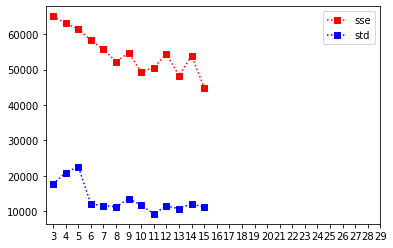

In [24]:
plt.plot(range(3, 16), kmeans_sse, c='r', ls=':', marker='s', label='sse')
plt.plot(range(3, 16), kmeans_stds, c='b', ls=':', marker='s', label='std')
plt.legend()
plt.xticks(range(3, 30))
plt.show()

In [7]:
kpp_means_sse = []
kpp_means_stds = []
for i in trange(3, 30):
    cur_sses = []
    for j in trange(0, 10):
        centroid, cluster_assment = kpp_means(mat(inflow_norm), i)
        cur_sses.append(sum(cluster_assment[:,1]))
    kpp_means_sse.append(sum(cur_sses)/10)
    kpp_means_stds.append(std(cur_sses, ddof=1))

 15%|█▍        | 4/27 [11:09<1:04:08, 167.31s/it]


KeyboardInterrupt: 